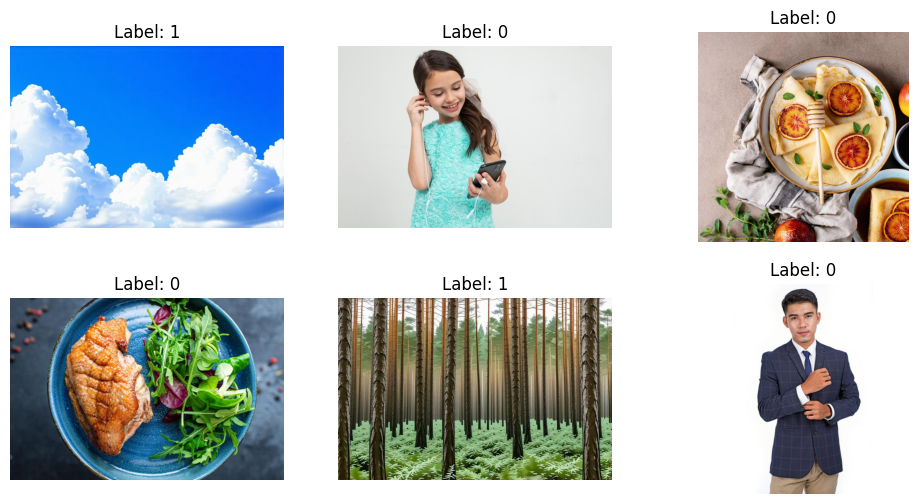

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Define paths
train_csv_path = "/Users/ankitsanjyal/Desktop/Projects/Portfolio/AI-REAL-IMAGES-DATA/train.csv"  
train_images_path = "/Users/ankitsanjyal/Desktop/Projects/Portfolio/AI-REAL-IMAGES-DATA/"  

# Load train.csv
df_train = pd.read_csv(train_csv_path)

# Ensure correct file paths using 'file_name' column
df_train["image_path"] = df_train["file_name"].apply(lambda x: os.path.join(train_images_path, x))

# Select random images
sample_images = df_train.sample(6, random_state=42)

# Function to load and display images safely
def show_images(image_paths, labels):
    plt.figure(figsize=(12, 6))
    for i, (img_path, label) in enumerate(zip(image_paths, labels)):
        if not os.path.exists(img_path):  # Check if file exists
            print(f"Skipping missing file: {img_path}")
            continue
        
        img = cv2.imread(img_path)
        if img is None:
            print(f"Error loading image: {img_path}")
            continue
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Label: {label}")

    plt.show()

# Show images
show_images(sample_images["image_path"].values, sample_images["label"].values)


Label Distribution

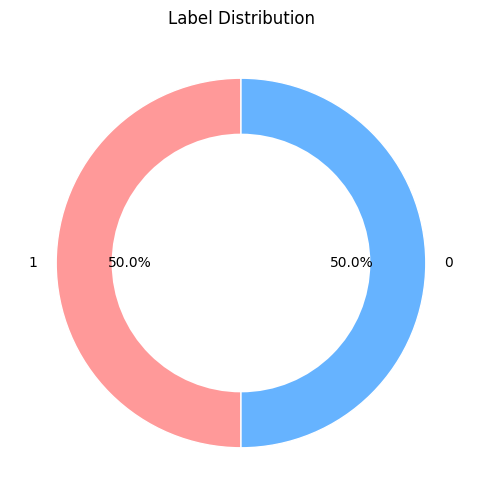

In [2]:
# Count label distribution
label_counts = df_train["label"].value_counts()

# Plot doughnut chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "white"}, 
        colors=["#ff9999", "#66b3ff"])  # Adjust colors as needed

# Create a circle at the center to make it a doughnut
center_circle = plt.Circle((0, 0), 0.70, fc="white")
plt.gca().add_artist(center_circle)

plt.title("Label Distribution")
plt.show()

## Image Dimensions check

In [3]:
from collections import Counter

# Store dimensions
dimensions = []

for img_path in df_train["image_path"]:
    img = cv2.imread(img_path)
    if img is not None:
        dimensions.append(img.shape[:2])  # (height, width)

# Count unique dimension occurrences
dim_counts = Counter(dimensions)
print("Image Dimension Counts:", dim_counts)

Image Dimension Counts: Counter({(512, 768): 41798, (768, 512): 11648, (496, 768): 5488, (576, 768): 2440, (768, 768): 1598, (768, 496): 1544, (432, 768): 1314, (480, 768): 1310, (528, 768): 1118, (768, 576): 868, (544, 768): 824, (464, 768): 758, (560, 768): 696, (448, 768): 540, (416, 768): 508, (768, 528): 456, (608, 768): 376, (768, 544): 374, (768, 560): 372, (400, 768): 372, (592, 768): 350, (384, 768): 308, (768, 608): 248, (624, 768): 244, (240, 768): 240, (768, 592): 234, (640, 768): 232, (656, 768): 210, (368, 768): 188, (672, 768): 182, (720, 768): 174, (768, 480): 154, (336, 768): 152, (768, 752): 152, (320, 768): 150, (704, 768): 148, (768, 624): 146, (688, 768): 140, (752, 768): 138, (352, 768): 136, (768, 656): 130, (736, 768): 130, (768, 640): 126, (768, 688): 110, (768, 672): 104, (272, 768): 102, (304, 768): 102, (256, 768): 98, (768, 720): 96, (224, 768): 94, (288, 768): 92, (768, 736): 90, (768, 704): 70, (768, 464): 70, (768, 432): 38, (768, 448): 28, (192, 768): 2

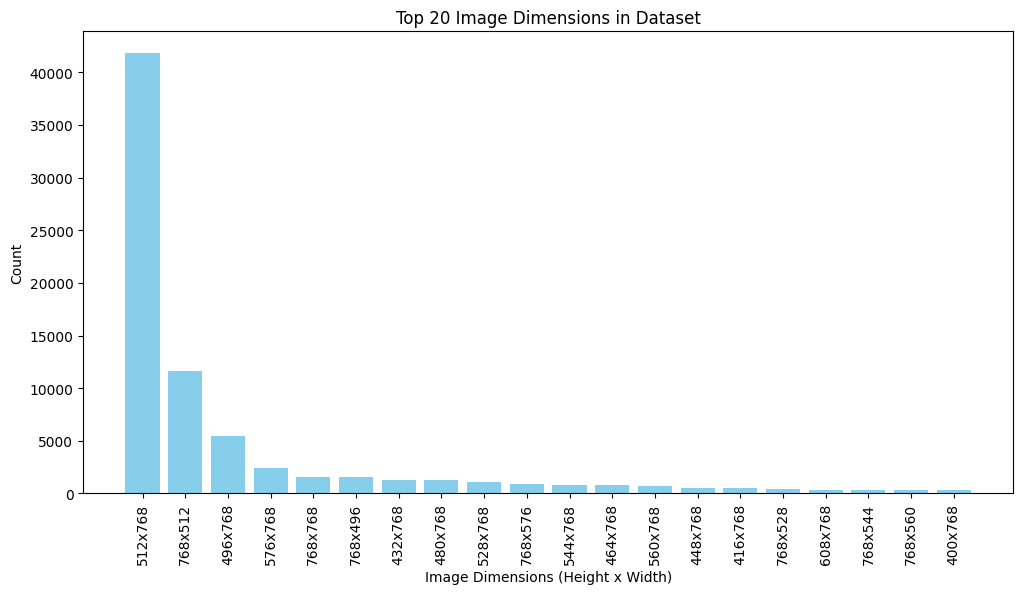

In [4]:

# Convert dimension counts to a sorted list
dim_counts_sorted = sorted(dim_counts.items(), key=lambda x: x[1], reverse=True)

# Extract dimensions and their frequencies
dimensions, counts = zip(*dim_counts_sorted)

# Convert tuple dimensions to string labels for better readability
dimension_labels = [f"{dim[0]}x{dim[1]}" for dim in dimensions]

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(dimension_labels[:20], counts[:20], color="skyblue")  # Show top 20 dimensions

plt.xticks(rotation=90)
plt.xlabel("Image Dimensions (Height x Width)")
plt.ylabel("Count")
plt.title("Top 20 Image Dimensions in Dataset")
plt.show()

Looks like the dataset needs some change and needs conversion of the images into same scale

But before that let's check few other things about how images are distributed

## Color Distributions check

* To check how the RGB values are distributed among the images
* To check how different the patterns pf RGB values is for AI generated and Real images 
* To check the contrast of images
* To check if the filters are applied to any images

In [ ]:

def plot_color_distribution(image_path, label):
    img = cv2.imread(image_path)
    if img is None:
        return
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    colors = ["Red", "Green", "Blue"]
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Display the image with its label
    axes[0].imshow(img_rgb)
    axes[0].axis("off")
    axes[0].set_title(f"Label: {label}")

    # Plot color distribution
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
        axes[1].plot(hist, color=color.lower(), label=color)

    axes[1].legend()
    axes[1].set_title("Color Distribution")
    
    plt.show()

# Select a random image and its label
sample = df_train.sample(1).iloc[0]
plot_color_distribution(sample["image_path"], sample["label"])

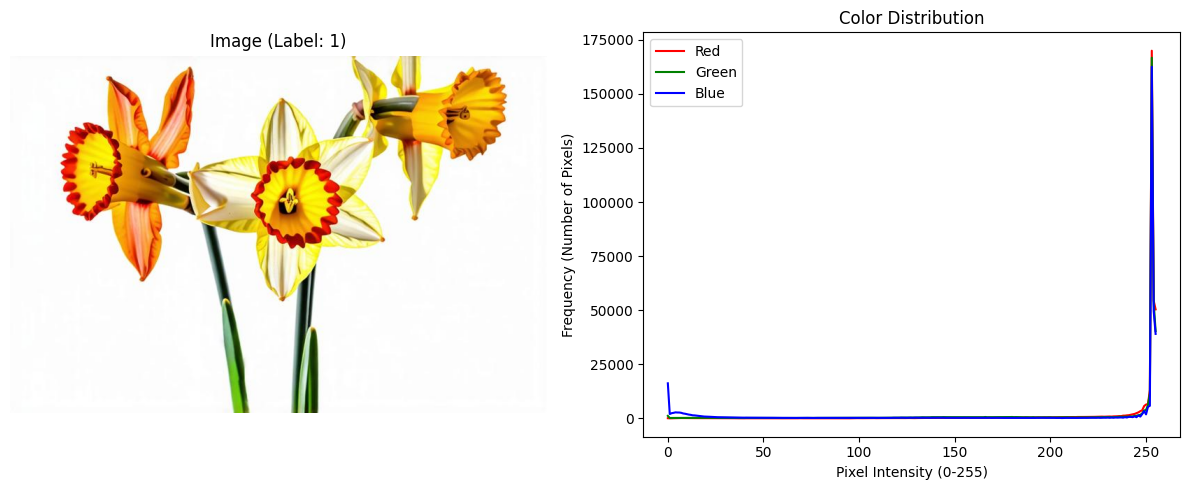

In [8]:

def plot_color_distribution(image_path, label):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read {image_path}")
        return
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    colors = ["Red", "Green", "Blue"]

    # Create figure with two subplots (Image + Color Distribution)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Show Image
    axes[0].imshow(img_rgb)
    axes[0].axis("off")
    axes[0].set_title(f"Image (Label: {label})")

    # Plot Color Distribution
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
        axes[1].plot(hist, color=color.lower(), label=color)
    
    axes[1].set_xlabel("Pixel Intensity (0-255)")
    axes[1].set_ylabel("Frequency (Number of Pixels)")
    axes[1].set_title("Color Distribution")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Select a random sample
sample = df_train.sample(1).iloc[0]
sample_img_path = sample["image_path"]
sample_label = sample["label"]

plot_color_distribution(sample_img_path, sample_label)

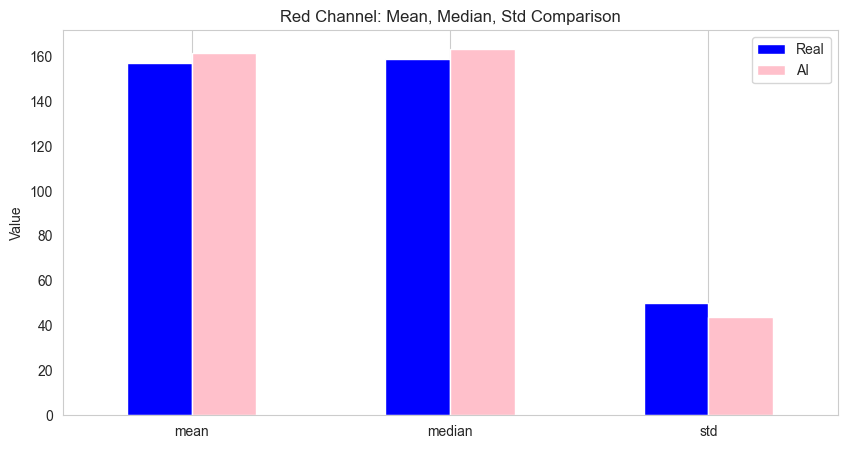

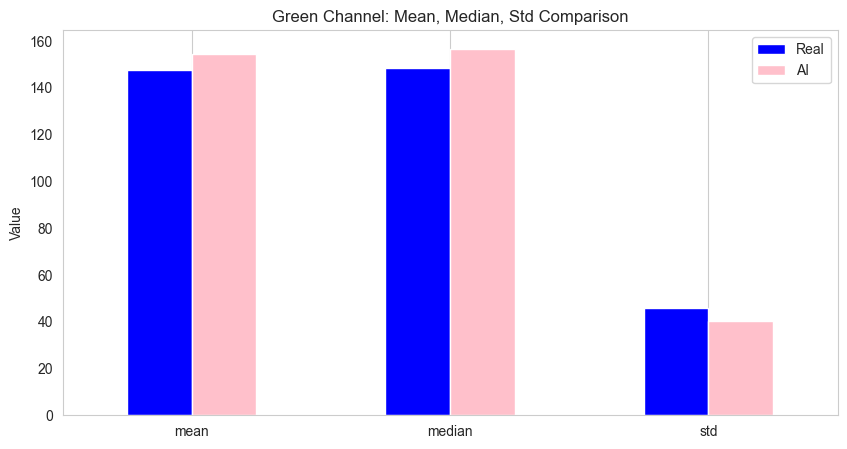

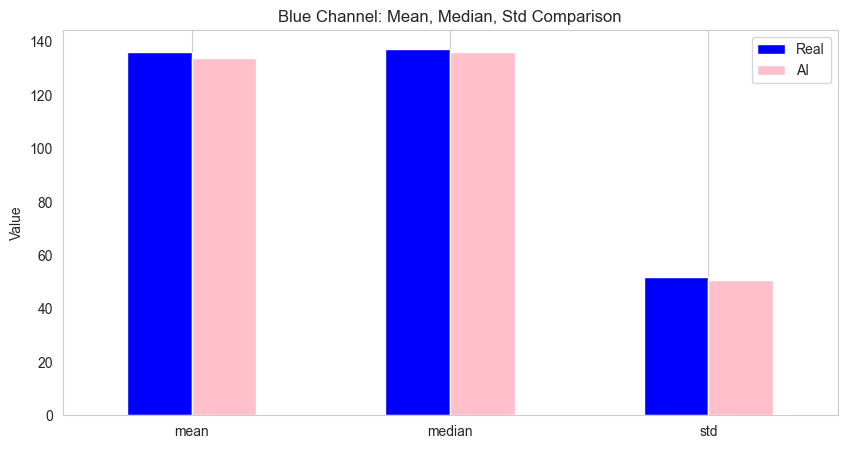

In [47]:

# Function to compute statistics for each label
def compute_channel_stats(image_paths, labels):
    data = {"label": [], "R": [], "G": [], "B": []}
    
    for img_path, label in zip(image_paths, labels):
        img = cv2.imread(img_path)
        if img is None:
            continue
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Compute mean values for each channel
        data["R"].append(np.mean(img_rgb[:, :, 0]))
        data["G"].append(np.mean(img_rgb[:, :, 1]))
        data["B"].append(np.mean(img_rgb[:, :, 2]))
        data["label"].append(label)

    return pd.DataFrame(data)

# Extract file paths and labels
image_paths = df_train["image_path"].values
labels = df_train["label"].values  # Assuming 0 = Real, 1 = AI

# Compute data
df_channels = compute_channel_stats(image_paths, labels)

# Calculate mean, median, and std for each channel
stats_df = df_channels.groupby("label").agg(["mean", "median", "std"]).T
stats_df.columns = ["Real", "AI"]

# Plot function
def plot_comparison(stats, title):
    stats.plot(kind="bar", figsize=(10, 5), color=["blue", "pink"])
    plt.title(title)
    plt.ylabel("Value")
    plt.xticks(rotation=0)
    plt.legend(["Real", "AI"])
    plt.grid(axis="y")
    plt.show()

# Generate plots
plot_comparison(stats_df.loc["R"], "Red Channel: Mean, Median, Std Comparison")
plot_comparison(stats_df.loc["G"], "Green Channel: Mean, Median, Std Comparison")
plot_comparison(stats_df.loc["B"], "Blue Channel: Mean, Median, Std Comparison")

## Conclusion from plot
# Red channel
* Mean of Ai generated images is higher by little bit than real images suggesting the AI images are more reddish in color
* Median and Mean are almost similar i.e, color distribution is symmetric
* The standard deviation shows that the AI generated images are more smotther less varied red tones ie, real images are capturing more natural lighting, effects, shadows and highlights

# Blue Channel
* Similar to Red channel

# Green Channel
* Mean and median for Real images is greater than AI images i.e, the greeniness in real images is higher compared to AI generated images

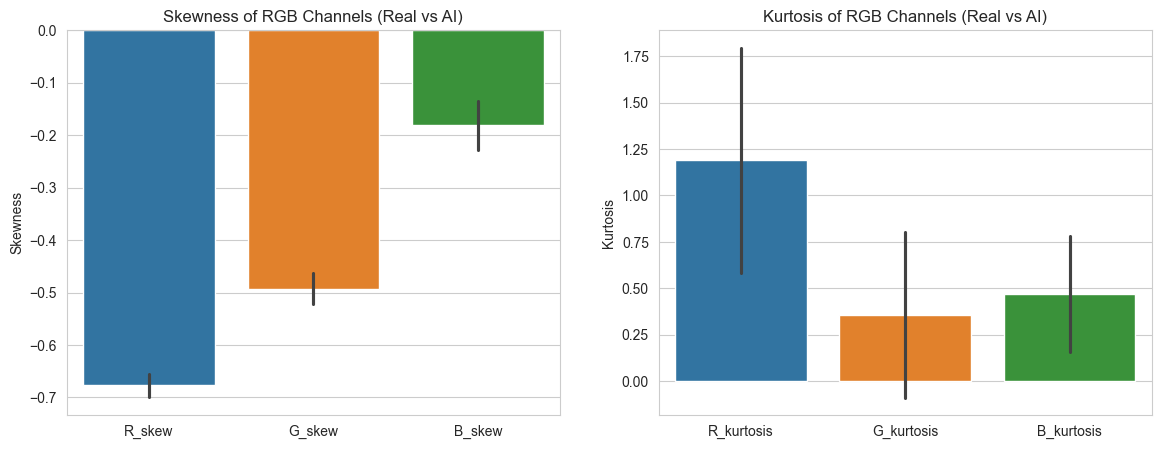

In [49]:

# Function to compute skewness and kurtosis
def compute_skew_kurt(image_paths):
    stats = {"label": [], "R_skew": [], "G_skew": [], "B_skew": [],
             "R_kurtosis": [], "G_kurtosis": [], "B_kurtosis": []}
    
    for img_path, label in image_paths:
        img = cv2.imread(img_path)
        if img is None:
            continue
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Compute skewness and kurtosis for each channel
        stats["label"].append(label)
        stats["R_skew"].append(skew(img_rgb[:, :, 0].flatten()))
        stats["G_skew"].append(skew(img_rgb[:, :, 1].flatten()))
        stats["B_skew"].append(skew(img_rgb[:, :, 2].flatten()))

        stats["R_kurtosis"].append(kurtosis(img_rgb[:, :, 0].flatten()))
        stats["G_kurtosis"].append(kurtosis(img_rgb[:, :, 1].flatten()))
        stats["B_kurtosis"].append(kurtosis(img_rgb[:, :, 2].flatten()))

    return pd.DataFrame(stats)

# Extract file paths and labels for the ENTIRE dataset
image_data = list(zip(df_train["image_path"], df_train["label"]))

# Compute skewness & kurtosis
skew_kurt_df = compute_skew_kurt(image_data)

# Group by label to compute average values per class
agg_skew_kurt = skew_kurt_df.groupby("label").mean()

# Plot the skewness & kurtosis comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Skewness
sns.barplot(data=agg_skew_kurt[["R_skew", "G_skew", "B_skew"]], ax=axes[0])
axes[0].set_title("Skewness of RGB Channels (Real vs AI)")
axes[0].set_ylabel("Skewness")

# Kurtosis
sns.barplot(data=agg_skew_kurt[["R_kurtosis", "G_kurtosis", "B_kurtosis"]], ax=axes[1])
axes[1].set_title("Kurtosis of RGB Channels (Real vs AI)")
axes[1].set_ylabel("Kurtosis")

plt.show()

## Pixel intensity check

* To check brightness and darkness of images
* To check the variation of lighting, shadows and texture

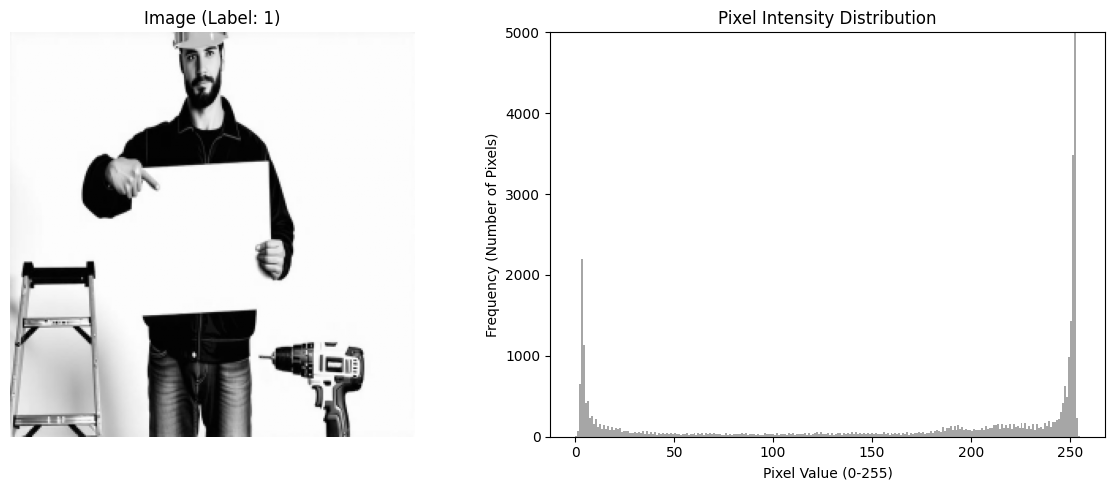

In [ ]:

def plot_pixel_intensity(image_path, label):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    if img is None:
        print(f"Error: Unable to read {image_path}")
        return
    
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)

    # Check if the image is completely blank (all pixels same)
    if np.all(img == img[0, 0]):
        print(f"Warning: Image {image_path} has uniform intensity ({img[0, 0]})")
    
    # Create figure with 2 subplots (Image + Pixel Intensity Distribution)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Show Image
    axes[0].imshow(img, cmap="gray")
    axes[0].axis("off")
    axes[0].set_title(f"Image (Label: {label})")

    # Plot Pixel Intensity Distribution
    axes[1].hist(img.ravel(), bins=256, color="gray", alpha=0.7)
    axes[1].set_ylim(0, 5000)
    axes[1].set_xlabel("Pixel Value (0-255)")
    axes[1].set_ylabel("Frequency (Number of Pixels)")
    axes[1].set_title("Pixel Intensity Distribution")
    
    plt.tight_layout()
    plt.show()

# Select a random sample
sample = df_train.sample(1).iloc[0]
sample_img_path = sample["image_path"]
sample_label = sample["label"]

plot_pixel_intensity(sample_img_path, sample_label)

In [33]:

# Function to compute intensity statistics for each label
def compute_intensity_stats(image_paths, labels):
    data = {"label": [], "mean_intensity": [], "median_intensity": [], "std_intensity": []}
    
    for img_path, label in zip(image_paths, labels):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        if img is None:
            continue
        
        # Compute intensity statistics
        data["mean_intensity"].append(np.mean(img))
        data["median_intensity"].append(np.median(img))
        data["std_intensity"].append(np.std(img))
        data["label"].append(label)

    return pd.DataFrame(data)

# Extract file paths and labels
image_paths = df_train["image_path"].values
labels = df_train["label"].values  # Assuming 0 = Real, 1 = AI

# Compute pixel intensity data
df_intensity = compute_intensity_stats(image_paths, labels)



KeyboardInterrupt: 

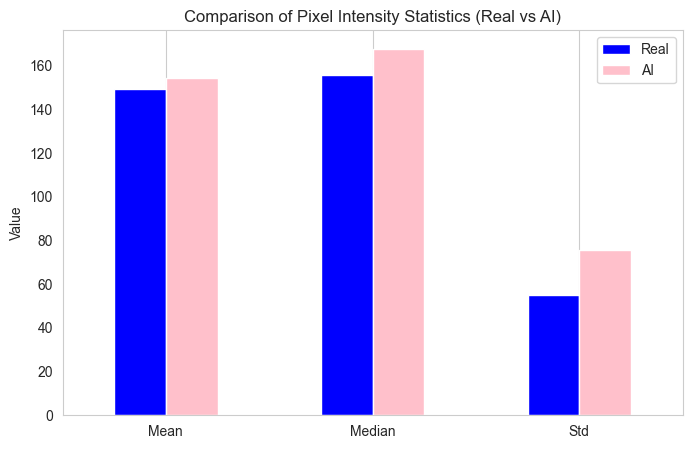

In [77]:
# Calculate mean, median, and std for each label
stats_df = df_intensity.groupby("label")[["mean_intensity", "median_intensity", "std_intensity"]].mean().T
stats_df.columns = ["Real", "AI"]  # Rename columns for clarity
stats_df.index = ["Mean", "Median", "Std"]  # Set x-axis labels

# Plot the comparison
stats_df.plot(kind="bar", figsize=(8, 5), color=["blue", "pink"])
plt.title("Comparison of Pixel Intensity Statistics (Real vs AI)")
plt.ylabel("Value")
plt.xticks(rotation=0)  # Keep x-axis labels readable
plt.legend(["Real", "AI"])
plt.grid(axis="y")
plt.show()

## Conclusion
* AI images seems to have higher brightness overall than Real images (higher mean)
* The median is little greater than mean i.e, left-skewed pixel distribution in images
* AI images have higher median i.e, they lack deep shadows or are more uniformly bright
* AI images has more variation in brightness(high std)(high constrant)
* Real images are more flatter and have uniform look

### Summary of Pixel Intensity Statistics (Real vs AI)

| **Statistic** | **Low Value** | **High Value** |
|--------------|--------------|--------------|
| **Mean** | Darker images | Brighter images |
| **Median** | More shadows | More uniform brightness |
| **Std** | Flat, smooth images | High contrast, detailed images |

- **Mean Intensity**: Higher values indicate brighter images.
- **Median Intensity**: If mean > median, the image is skewed toward bright pixels.
- **Standard Deviation**: Higher std means more contrast and texture.


In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def detect_spikes(image_path, threshold=2000, smoothing_window=5):
    """
    Detects spikes in the pixel intensity histogram of an image.
    
    Args:
        image_path (str): Path to the image.
        threshold (int): Minimum height of a spike in the histogram.
        smoothing_window (int): Size of the moving average filter.
    
    Returns:
        bool: True if a spike is detected, False otherwise.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    if img is None:
        print(f"Error: Unable to read {image_path}")
        return False
    
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)

    # Compute histogram
    hist, bins = np.histogram(img.ravel(), bins=256, range=[0,256])

    # Apply smoothing using a moving average filter
    smoothed_hist = np.convolve(hist, np.ones(smoothing_window)/smoothing_window, mode='same')

    # Detect peaks (spikes)
    peaks, _ = find_peaks(smoothed_hist, height=threshold)

    # Return True if spikes are found, False otherwise
    return len(peaks) > 0

# Example usage on a sample dataset
df_train["has_spike"] = df_train["image_path"].apply(lambda x: 1 if detect_spikes(x) else 0)

# Train a classifier on this new feature
X = df_train[["has_spike"]]  # Only using spike presence as feature
y = df_train["label"]

# Train a simple SVM or Random Forest
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = SVC(kernel="linear")
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.59      0.70      0.64      7995
           1       0.63      0.51      0.56      7995

    accuracy                           0.60     15990
   macro avg       0.61      0.60      0.60     15990
weighted avg       0.61      0.60      0.60     15990

